# DecisionTree

کاربردش در فرام دیتکشن و پیشبینی اب و هوا

- عدم حساسیت به نورمالایز یا توضیع دیتا
- با دیتای نا مناسب جواب خوبی میده
- تریشولد یابی میکنی
- نسبت به داده های پرت و انرمال خوب کار کینه
- بدیش اینه که راحت اورفیت میشه
- کاهش بی نظمی دیتا
- خالص کردن داده ها همون بی نظمی

![alt text](image-1.png)



![alt text](image-2.png)

- ASM -> میاد فیچری که بیشترین تفکیک پذیری رو داره نشون میده

## ASM
- با 'gini', 'entropy' اس ام رو درمیارن

- Entropy => میزان بینظمی(ناخالصی )
- اگر همه داده‌ها یک کلاس باشند: Entropy = 0 (کاملاً منظم)
- اگر داده‌ها کاملاً مخلوط باشند: Entropy = 1 (کاملاً بی‌نظم)
- هرچی پایین تر باشه بیشتر میشه از دیتا نتیجه گرفت

![alt text](image-4.png)
Information Gain (افزایش اطلاعات)=>میزان کاهش آنتروپی پس از تقسیم داده

![alt text](image-6.png)
Gini Index (شاخص جینی) =>معیار دیگری برای اندازه‌گیری ناخالصی 
- pi=> احتمال ان ام




| معیار | Entropy (آنتروپی) | Gini Index (شاخص جینی) |
|-------|-------------------|------------------------|
| **فرمول** | `H(X) = -∑ p(x_i) * log(p(x_i))` | `Gini(D) = 1 - ∑ P_i²` |
| **محدوده مقادیر** | ۰ تا ۱ | ۰ تا ۰.۵ |
| **سرعت محاسبه** | کندتر (به دلیل لگاریتم) | سریع‌تر |
| **کاربرد اصلی** | تحقیقات تئوری | پیاده‌سازی عملی |
| **مقدار ایده‌آل** | ۰ (کاملاً خالص) | ۰ (کاملاً خالص) |
| **بدترین حالت** | ۱ (کاملاً مخلوط) | ۰.۵ (کاملاً مخلوط) |
| **پیچیدگی** | محاسباتی سنگین‌تر | محاسباتی سبک‌تر |

In [ ]:
# ! pip install pydotplus
# ! pip install graphviz
# ! pip install --upgrade pydotplus graphviz

In [3]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split , cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



import pydotplus #=> تبدیل نمودار به عکس
from sklearn.tree import export_graphviz  #=> مدل درخت رو میگیره و به فرمت برنامه گراف ویز در میاره
from IPython.display import Image
from io import BytesIO,StringIO  # فایلی داخل رم ذخیره میشه

In [ ]:
x,y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.1)
X_train.shape

(135, 4)

- criterion: Literal['gini', 'entropy', 'log_loss'] => همون ظریب های خورد کردن بالا
- splitter: Literal['best', 'random'] => اولی میاد همه فیچر هارو تست میکنه ولی رندم میاد فیچر های رندوم رو انخاب میکنه و برای دیتا هایی که فیچر زیاد دارن
- max_depth: Int | None = None, => تا چه عمقی برم پایین و با کم کردن عمق از اورفیت شدن جلوگیری میشود
- max_features =>  در تقسیم جای همه فیچر ها میاد مثلا 2 تا رو انتخاب میکنه و در فیچر بالا باعث رگوله میشه

In [5]:
model = DecisionTreeClassifier(max_depth=None,max_features=None)

sc = cross_val_score(model,X_train,y_train,cv=10)
sc.mean()

np.float64(0.9489010989010989)

In [6]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [7]:
model.score(x,y)

1.0

In [8]:
p = model.predict(x)

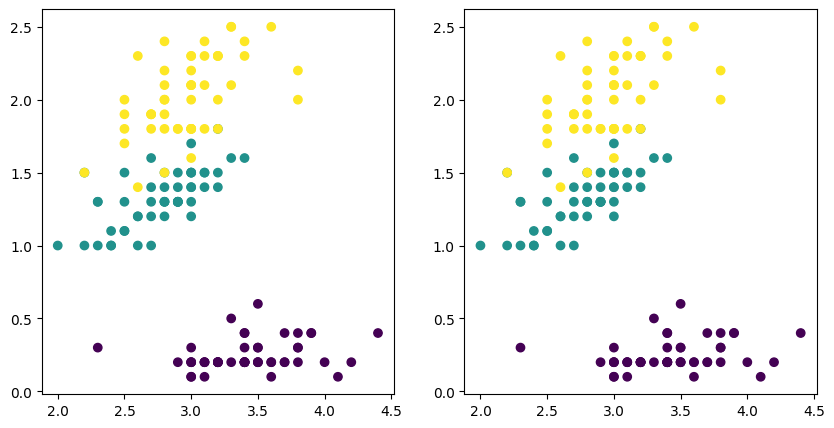

In [9]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(x[:, 1], x[:, 3], c=y)
plt.subplot(1, 2, 2)

plt.scatter(x[:, 1], x[:, 3], c=p)

In [10]:
# f = open('file.bin','w') # داخل هارد ذخیره میشه
# f.write('some data')

# f = StringIO()  # داخل رم ذخیره میشن 
# f.write('some data')

In [11]:
data = StringIO()
export_graphviz(model , out_file=data,filled=True,rounded=True,special_characters=True ,class_names=['A','B','C'])

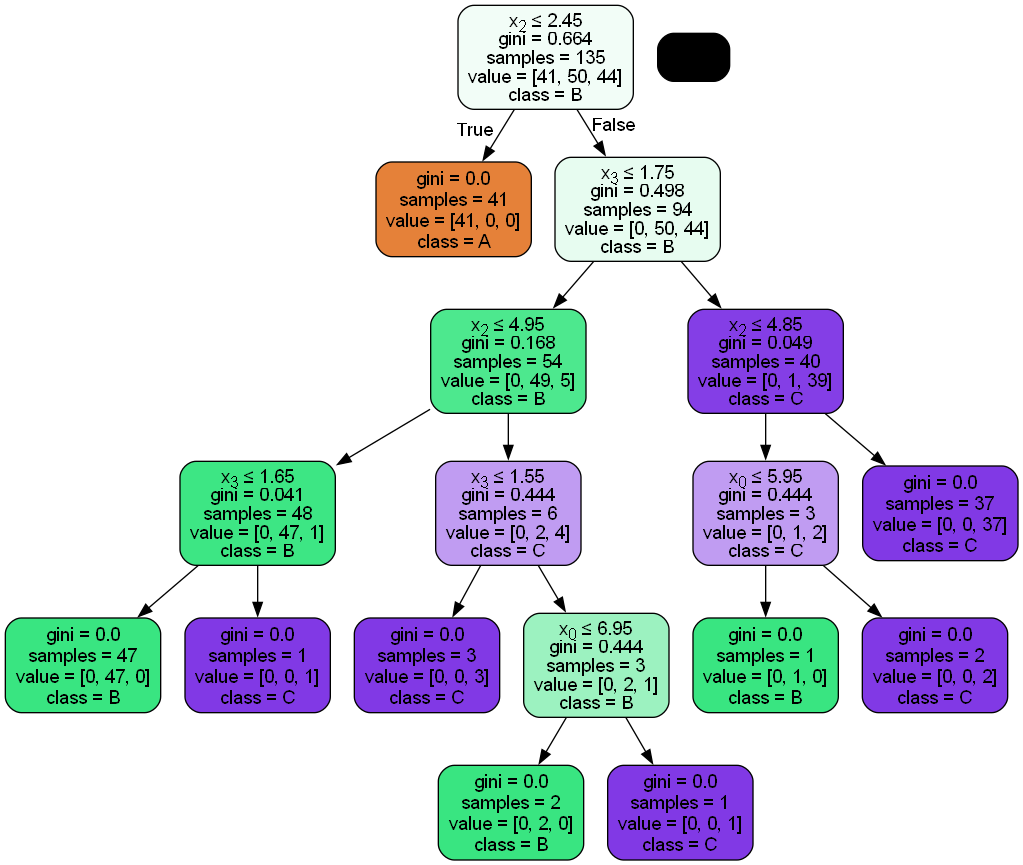

In [12]:
G = pydotplus.graph_from_dot_data(data=data.getvalue())
img = G.create_png()
Image(img)

In [13]:
model.feature_importances_ # میاد میگه هر فیچر چقدر اهمیتش بیشتره

array([0.02973241, 0.        , 0.5345826 , 0.435685  ])

الان داخل بالا فیچر 3و 4 پر اهمیت تر و میتونیم اونایی که تاثیر کمتر دارن رو حذف کرده

---

In [14]:
model = RandomForestClassifier(100)
model.fit(x,y)

RandomForestClassifier()

In [15]:
model.score(x,y)

1.0